In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### EDA

In [4]:
data=pd.read_csv('data/Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
data.shape

(10000, 6)

In [8]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
data.duplicated().sum()

127

In [12]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [14]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [16]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

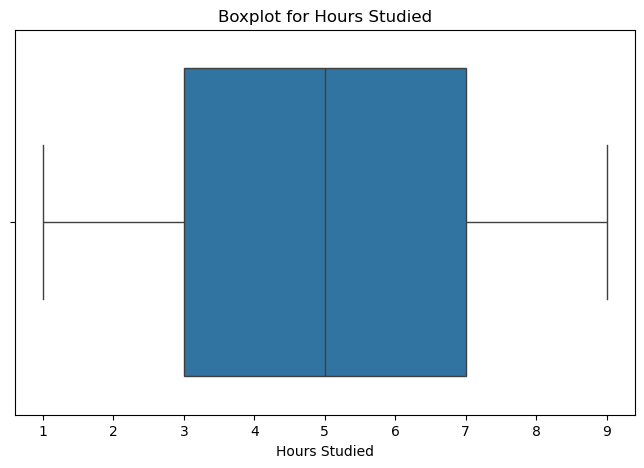

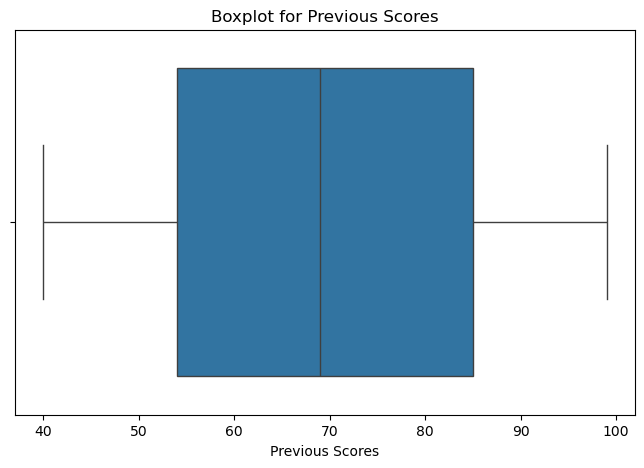

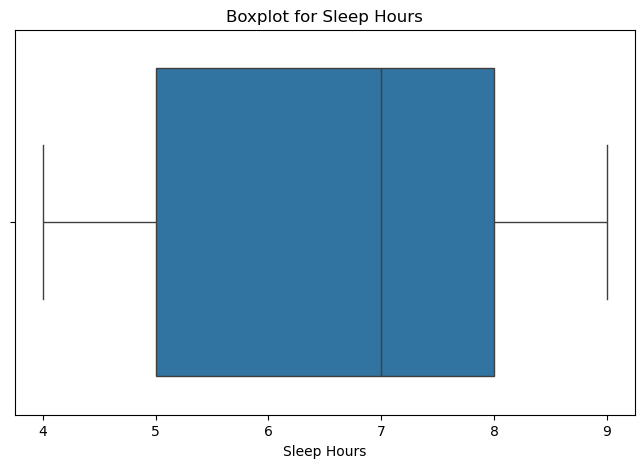

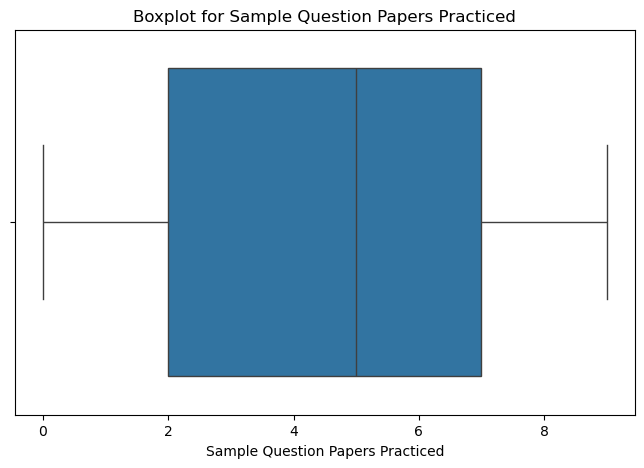

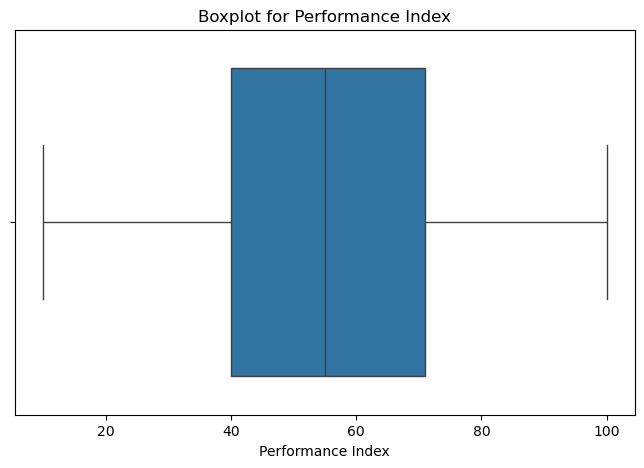

In [41]:
numerical_columns = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"]
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x=column)
    plt.title(f"Boxplot for {column}")
    plt.show()

### splitting x and y 

In [48]:
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### train test split 

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Linear Regression 

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2*100)


Mean Squared Error: 4.082628398521858
R-squared: 98.89832909573146


### SVR

In [59]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - MSE: {svr_mse:.2f}, R-squared: {svr_r2:.2f}")

Support Vector Regression - MSE: 4.09, R-squared: 0.99


### Decision tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, y_pred_tree)
decision_tree_r2 = r2_score(y_test, y_pred_tree)
print(f"Decision Tree Regressor - MSE: {decision_tree_mse:.2f}, R-squared: {decision_tree_r2:.2f}")

Decision Tree Regressor - MSE: 12.99, R-squared: 0.96


In [68]:
#END